In [1]:
NAME = "Anthony Kontos"

## Exploring Healthiness of Cereals

In this analysis we will be using descriptive statistics and basic visualizations to distinguish healthy cereals from unhealthy cereals

In [2]:
import numpy as np
import pandas as pd
import re

df=pd.read_csv('cereal.csv')
df['Type of Cereal'] = df['name']

new_names = ['Bran', 'Wheat', 'Fiber', 'Protein', 'Crunch', 'Corn', 'Nut', 'Rice']

def my_function(x, i):
    for name in new_names:
        x.loc[x[i].str.contains(name, case=False, na=False), i] = name
        
    pattern = '|'.join(new_names)
    x.loc[~x[i].str.contains(pattern, case=False, na=False), i] = 'Other'
    
my_function(df,'Type of Cereal')

In [3]:
nutrients = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating']

for category in nutrients:
    
    df.loc[~(df[category] > 0), category]=np.nan
    df[category]=df[category].fillna(df[category].median())


In [4]:
cols = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'cups', 'rating']

def my_function(x, i):
    for nutrient in i:
        x[nutrient] = x[nutrient]/x['weight']
    x['weight']=x['weight']/x['weight']
   
    
my_function(df, cols)    

In [5]:
df['Healthy or Unhealthy'] = 'Unhealthy'
## not sure if need all 5 to be classified as healthy or just one? 

## this is for just one
df.loc[df['calories'] < 100, 'Healthy or Unhealthy'] = 'Healthy'
df.loc[df['sodium'] < 150, 'Healthy or Unhealthy'] = 'Healthy'
df.loc[df['sugars'] < 9, 'Healthy or Unhealthy'] = 'Healthy'
df.loc[df['fiber'] > 3, 'Healthy or Unhealthy'] = 'Healthy'
df.loc[df['protein'] > 2, 'Healthy or Unhealthy'] = 'Healthy'

(df['Healthy or Unhealthy'].value_counts()/df['Healthy or Unhealthy'].count())*100


Healthy      85.714286
Unhealthy    14.285714
Name: Healthy or Unhealthy, dtype: float64

In [6]:
## this is for all
df['Healthy or Unhealthy'] = 'Unhealthy'

df.loc[(df['calories'] < 100) & (df['protein'] > 2) & (df['fiber'] > 3) & (df['sugars'] < 9) & (df['sodium'] < 150), 'Healthy or Unhealthy'] = 'Healthy'

(df['Healthy or Unhealthy'].value_counts()/df['Healthy or Unhealthy'].count())*100

Unhealthy    96.103896
Healthy       3.896104
Name: Healthy or Unhealthy, dtype: float64

In [7]:
df.groupby('Healthy or Unhealthy')['rating'].mean()

Healthy or Unhealthy
Healthy      64.947174
Unhealthy    42.395090
Name: rating, dtype: float64

In [8]:
df.groupby('Healthy or Unhealthy')['rating'].min()


Healthy or Unhealthy
Healthy      32.733638
Unhealthy    18.042851
Name: rating, dtype: float64

In [9]:
df.groupby('Healthy or Unhealthy')['rating'].max()

Healthy or Unhealthy
Healthy       93.704912
Unhealthy    126.011290
Name: rating, dtype: float64

In [10]:
df.groupby('Type of Cereal')['rating'].mean()

Type of Cereal
Bran      47.726661
Corn      40.482720
Crunch    26.078598
Nut       37.984083
Other     36.576565
Rice      68.023772
Wheat     63.332197
Name: rating, dtype: float64

In [11]:
df.groupby('Type of Cereal')['rating'].min()

Type of Cereal
Bran      19.061857
Corn      35.782791
Crunch    18.042851
Nut       28.055009
Other     20.208901
Rice      40.560159
Wheat     36.176196
Name: rating, dtype: float64

In [12]:
df.groupby('Type of Cereal')['rating'].max()

Type of Cereal
Bran       93.704912
Corn       45.863324
Crunch     36.523683
Nut        53.371007
Other      55.333142
Rice      121.512224
Wheat     126.011290
Name: rating, dtype: float64

<AxesSubplot:xlabel='Type of Cereal'>

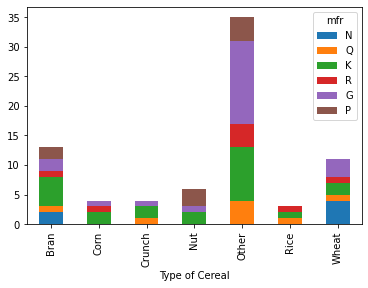

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df2 = df.groupby(['Type of Cereal', 'mfr'])['Type of Cereal'].count().unstack('mfr').fillna(0)
df2[['N','Q', 'K', 'R', 'G', 'P']].plot(kind='bar', stacked=True)

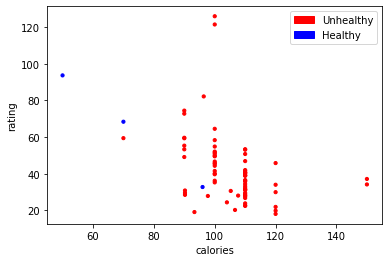

In [14]:
import matplotlib.patches as mpatches

#rating and calories + colored healthiness
color_code = {"H": "blue", "U": "red"}
legend_labels = ['Healthy', 'Unhealthy']

red_dots = mpatches.Patch(color='red', label='Unhealthy')
blue_dots = mpatches.Patch(color='blue', label='Healthy')

df.plot.scatter('calories', 'rating', c= [color_code[x[0]] for x in df['Healthy or Unhealthy']], s=10)

plt.legend(handles=[red_dots, blue_dots])


In [15]:
##The Bran shelf has the healthiest cereals as 2/3 of the healthy cereals
## are bran (if we assume all the nutritional standards for healthiness are met)
df.groupby(['Type of Cereal','Healthy or Unhealthy'])['name'].count()

## some conclusions we can make about the cereal dataset is that there are generally
## very few cereals that meet ALL the nutritional standards for 'healthy'. Statistically
## speaking, rice and wheat cereals are also the most beloved cereals among the general public
## as they carry the highest avg, min, and max ratings. On the other hand, Crunch cereals 
## are the least beloved, with the lowest avg, min, and max ratings. Cereals which meet at least
## one nutritional standard for healthiness are also rated higher by avg and min ratings; however,
## the max rating for unhealthy cereals is significantly higher than for cereals meeting at least one standard
## of unhealthiness.

Type of Cereal  Healthy or Unhealthy
Bran            Healthy                  2
                Unhealthy               11
Corn            Unhealthy                4
Crunch          Unhealthy                4
Nut             Healthy                  1
                Unhealthy                5
Other           Unhealthy               36
Rice            Unhealthy                3
Wheat           Unhealthy               11
Name: name, dtype: int64

In [16]:
df.info()
pd.set_option("max_rows", None)
df



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  77 non-null     object 
 1   mfr                   77 non-null     object 
 2   type                  77 non-null     object 
 3   calories              77 non-null     float64
 4   protein               77 non-null     float64
 5   fat                   77 non-null     float64
 6   sodium                77 non-null     float64
 7   fiber                 77 non-null     float64
 8   carbo                 77 non-null     float64
 9   sugars                77 non-null     float64
 10  potass                77 non-null     float64
 11  vitamins              77 non-null     float64
 12  shelf                 77 non-null     float64
 13  weight                77 non-null     float64
 14  cups                  77 non-null     float64
 15  rating                77 

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal,Healthy or Unhealthy
0,100% Bran,N,C,70.000000,4.000000,1.000000,130.000000,10.000000,5.000000,6.000000,280.000000,25.000000,3.000000,1.0,0.330000,68.402973,Bran,Healthy
1,100% Natural Bran,Q,C,120.000000,3.000000,5.000000,15.000000,2.000000,8.000000,8.000000,135.000000,25.000000,3.000000,1.0,1.000000,33.983679,Bran,Unhealthy
2,All-Bran,K,C,70.000000,4.000000,1.000000,260.000000,9.000000,7.000000,5.000000,320.000000,25.000000,3.000000,1.0,0.330000,59.425505,Bran,Unhealthy
3,All-Bran with Extra Fiber,K,C,50.000000,4.000000,1.000000,140.000000,14.000000,8.000000,8.000000,330.000000,25.000000,3.000000,1.0,0.500000,93.704912,Bran,Healthy
4,Almond Delight,R,C,110.000000,2.000000,2.000000,200.000000,1.000000,14.000000,8.000000,90.000000,25.000000,3.000000,1.0,0.750000,34.384843,Other,Unhealthy
5,Apple Cinnamon Cheerios,G,C,110.000000,2.000000,2.000000,180.000000,1.500000,10.500000,10.000000,70.000000,25.000000,1.000000,1.0,0.750000,29.509541,Other,Unhealthy
6,Apple Jacks,K,C,110.000000,2.000000,1.000000,125.000000,1.000000,11.000000,14.000000,30.000000,25.000000,2.000000,1.0,1.000000,33.174094,Other,Unhealthy
7,Basic 4,G,C,97.744361,2.255639,1.503759,157.894737,1.503759,13.533835,6.015038,75.187970,18.796992,2.255639,1.0,0.563910,27.848543,Other,Unhealthy
8,Bran Chex,R,C,90.000000,2.000000,1.000000,200.000000,4.000000,15.000000,6.000000,125.000000,25.000000,1.000000,1.0,0.670000,49.120253,Bran,Unhealthy
9,Bran Flakes,P,C,90.000000,3.000000,1.000000,210.000000,5.000000,13.000000,5.000000,190.000000,25.000000,3.000000,1.0,0.670000,53.313813,Bran,Unhealthy
